<a href="https://colab.research.google.com/github/MohammedShabry/DL-Assignment/blob/Dhananjaya-IT21185052/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load and preprocess the dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df = df.drop(columns=['customerID'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Preprocessing completed successfully!")




Preprocessing completed successfully!


<ipython-input-2-479d4e2e4452>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [3]:
# Reshape for CNN input
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [4]:
# Define the CNN model with improvements
cnn_model = Sequential()

# Add a Convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(BatchNormalization())  # Add Batch Normalization
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten layer
cnn_model.add(Flatten())

# Dense layers with Dropout
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(0.3))  # Adjust Dropout to 0.3
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dropout(0.3))

# Output layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Set callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [6]:
# Train the CNN model with validation split
cnn_history = cnn_model.fit(X_train_reshaped, y_train,
                            epochs=100, batch_size=32,
                            validation_split=0.2,
                            callbacks=[early_stopping, reduce_lr])

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7439 - loss: 0.5359 - val_accuracy: 0.7879 - val_loss: 0.5633 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.4699 - val_accuracy: 0.7853 - val_loss: 0.5088 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.4456 - val_accuracy: 0.7844 - val_loss: 0.4343 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4279 - val_accuracy: 0.7941 - val_loss: 0.4167 - learning_rate: 0.0010
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4428 - val_accuracy: 0.7933 - val_loss: 0.4251 - learning_rate: 0.0010
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.4379 - val_accuracy: 0.7933 - val_loss: 0.4222 - learning_rate: 0.0010
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7863 - loss: 0.

In [7]:
# Evaluate on test data
cnn_score = cnn_model.evaluate(X_test_reshaped, y_test)

# Print test loss and accuracy
print(f'Test Loss: {cnn_score[0]}')
print(f'Test Accuracy: {cnn_score[1]}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.4124
Test Loss: 0.41017207503318787
Test Accuracy: 0.8105039000511169


In [8]:
# Make predictions on test data
cnn_preds = cnn_model.predict(X_test_reshaped)

# Binarize predictions (Threshold of 0.5)
cnn_preds = (cnn_preds > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [9]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, cnn_preds))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



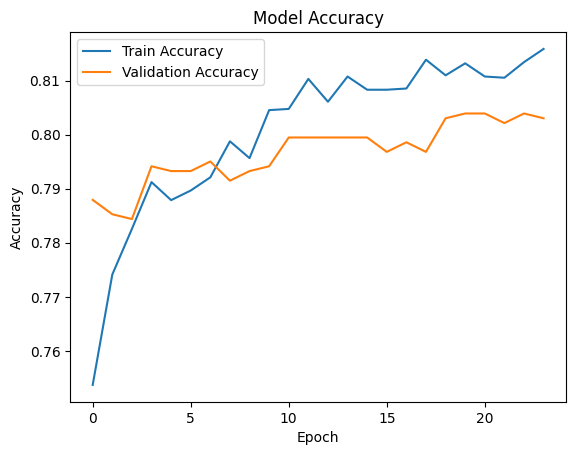

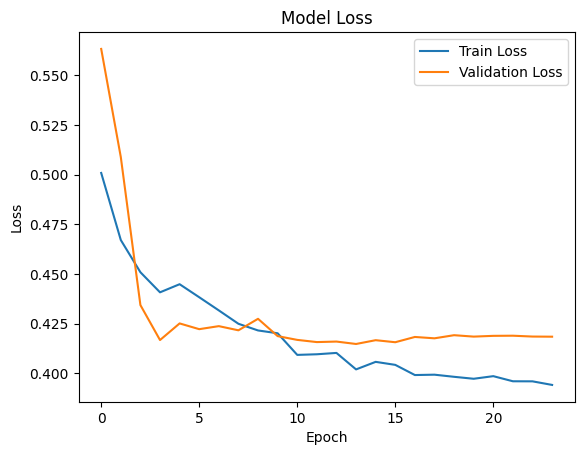

In [10]:
# Plot training & validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()